In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
glogs = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/game_logs.csv')

# Convert date column to datetime, filters out dates before 2005 
glogs['date'] = pd.to_datetime(glogs['date'], format=r'%Y%m%d')
glogs = glogs[glogs['date'].dt.year >= 2005]
glogs['year'] = glogs['date'].dt.year

# Specify columns to keep for analysis
glogs = glogs[['date', 'year', 'day_of_week', 'v_name', 'v_league', 'v_game_number', 'h_name', 'h_league', 
               'h_game_number', 'v_score', 'h_score', 'day_night', 'park_id', 'attendance']]

# Remove international ballparks that were only used for one random game
glogs = glogs[~glogs['park_id'].isin(['SYD01', 'TOK01', "SJU01", 'FTB01', 'LBV01'])]

# Create week number variable
glogs['week'] = glogs['h_game_number']//7+1
glogs = glogs[glogs['attendance'] > 0]

glogs

,date,year,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,day_night,park_id,attendance,week
0,2005-04-03,2005,Sun,BOS,AL,1,NYA,AL,1,2,9,N,NYC16,54818.0,1
1,2005-04-04,2005,Mon,OAK,AL,1,BAL,AL,1,0,4,D,BAL12,48271.0,1
2,2005-04-04,2005,Mon,CLE,AL,1,CHA,AL,1,0,1,D,CHI12,38141.0,1
3,2005-04-04,2005,Mon,KCA,AL,1,DET,AL,1,2,11,D,DET05,44105.0,1
4,2005-04-04,2005,Mon,MIN,AL,1,SEA,AL,1,1,5,D,SEA03,46249.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29151,2016-10-02,2016,Sun,MIL,NL,162,COL,NL,162,6,4,D,DEN02,27762.0,24
29152,2016-10-02,2016,Sun,NYN,NL,162,PHI,NL,162,2,5,D,PHI13,36935.0,24
29153,2016-10-02,2016,Sun,LAN,NL,162,SFN,NL,162,1,7,D,SFO03,41445.0,24
29154,2016-10-02,2016,Sun,PIT,NL,162,SLN,NL,162,4,10,D,STL10,44615.0,24


In [3]:
# Rename stadium names in park_id column
# STL09 = Busch Stadium II
# STL10 = Busch Stadium III
# NYC16 = Old Yankee Stadium
# NYC17 = Shea Stadium
# NYC20 = Citi Field
# NYC21 = New Yankee Stadium
# WAS10 = RFK Stadium
# WAS11 = Nationals Park
# MIA01 = Sun Life Stadium
# MIA02 = Marlins Park
# MIN03 = Metrodome
# MIN04 = Target Field
glogs['park_id'] = glogs['park_id'].replace({'ANA01': 'Angel Stadium',
                                             'ARL02': 'Globe Life Field',
                                             'ATL02': 'Turner Field',
                                             'BAL12': 'Camden Yards',
                                             'BOS07': 'Fenway Park',
                                             'CHI11': 'Wrigley Field',
                                             'CHI12': 'US Cellular Field',
                                             'CIN09': 'Great American Ball Park',
                                             'CLE08': 'Progressive Field',
                                             'DEN02': 'Coors Field',
                                             'DET05': 'Comerica Park',
                                             'HOU03': 'Minute Maid Park',
                                             'KAN06': 'Kauffman Stadium',
                                             'LOS03': 'Dodger Stadium',
                                             'MIA01': 'Sun Life Stadium',
                                             'MIA02': 'Marlins Park',
                                             'MIL06': 'Miller Park',
                                             'MIN03': 'Metrodome',
                                             'MIN04': 'Target Field',
                                             'NYC16': 'Old Yankee Stadium',
                                             'NYC17': 'Shea Stadium',
                                             'NYC20': 'Citi Field',
                                             'NYC21': 'New Yankee Stadium',
                                             'OAK01': 'Coliseum',
                                             'PHI13': 'Citizens Bank Park',
                                             'PHO01': 'Chase Field',
                                             'PIT08': 'PNC Park',
                                             'SAN02': 'Petco Park',
                                             'SEA03': 'Safeco Field',
                                             'SFO03': 'AT&T Park',
                                             'STL09': 'Busch Stadium II',
                                             'STL10': 'Busch Stadium III',
                                             'STP01': 'Tropicana Field',
                                             'TOR02': 'Rogers Centre',
                                             'WAS10': 'RFK Stadium',
                                             'WAS11': 'Nationals Park',
                                             })
glogs.head()

,date,year,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,day_night,park_id,attendance,week
0,2005-04-03,2005,Sun,BOS,AL,1,NYA,AL,1,2,9,N,Old Yankee Stadium,54818.0,1
1,2005-04-04,2005,Mon,OAK,AL,1,BAL,AL,1,0,4,D,Camden Yards,48271.0,1
2,2005-04-04,2005,Mon,CLE,AL,1,CHA,AL,1,0,1,D,US Cellular Field,38141.0,1
3,2005-04-04,2005,Mon,KCA,AL,1,DET,AL,1,2,11,D,Comerica Park,44105.0,1
4,2005-04-04,2005,Mon,MIN,AL,1,SEA,AL,1,1,5,D,Safeco Field,46249.0,1


In [4]:
# Rename team abbreviations for consistency with conventional abbreviations
glogs['v_name'] = glogs['v_name'].replace({'ANA':'LAA',
                         'CHA':'CHW',
                         'CHN':'CHC',
                         'FLO':'MIA',
                         'KCA':'KC',
                         'LAN':'LAD',
                         'NYA':'NYY',
                         'NYN':'NYM',
                         'SDN':'SD',
                         'SFN':'SF',
                         'SLN':'STL',
                         'TBA':'TB',
                         'WAS':'WSH'})
glogs['h_name'] = glogs['h_name'].replace({'ANA':'LAA',
                         'CHA':'CHW',
                         'CHN':'CHC',
                         'FLO':'MIA',
                         'KCA':'KC',
                         'LAN':'LAD',
                         'NYA':'NYY',
                         'NYN':'NYM',
                         'SDN':'SD',
                         'SFN':'SF',
                         'SLN':'STL',
                         'TBA':'TB',
                         'WAS':'WSH'})
glogs['h_name'].sort_values().unique()

array(['ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', 'CLE', 'COL',
       'DET', 'HOU', 'KC', 'LAA', 'LAD', 'MIA', 'MIL', 'MIN', 'NYM',
       'NYY', 'OAK', 'PHI', 'PIT', 'SD', 'SEA', 'SF', 'STL', 'TB', 'TEX',
       'TOR', 'WSH'], dtype=object)

In [5]:
# Add column 'location'
glogs['location'] = glogs['h_name'].map({'ARI': 'Arizona', 'ATL': 'Atlanta', 'BAL': 'Baltimore', 'BOS': 'Boston', 'CHC': 'Chicago',
                                         'CHW': 'Chicago', 'CIN': 'Cincinatti', 'CLE': 'Cleveland', 'COL': 'Colorado', 'DET': 'Detroit',
                                         'HOU': 'Houston', 'KC': 'Kansas City', 'LAA': 'Los Angeles', 'LAD': 'Los Angeles', 'MIA': 'Miami',
                                         'MIL': 'Miluakee', 'MIN': 'Minnesota', 'NYM': 'New York', 'NYY': 'New York', 'OAK': 'Oakland',
                                         'PHI': 'Philadelphia', 'PIT': 'Pittsburgh', 'SD': 'San Diego', 'SEA': 'Seattle',
                                         'SF': 'San Francisco', 'STL': 'St. Louis', 'TB': 'Tampa Bay', 'TEX': 'Texas', 'TOR': 'Toronto',
                                         'WSH': 'Washington, D.C.'
})
glogs.head()

,date,year,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,day_night,park_id,attendance,week,location
0,2005-04-03,2005,Sun,BOS,AL,1,NYY,AL,1,2,9,N,Old Yankee Stadium,54818.0,1,New York
1,2005-04-04,2005,Mon,OAK,AL,1,BAL,AL,1,0,4,D,Camden Yards,48271.0,1,Baltimore
2,2005-04-04,2005,Mon,CLE,AL,1,CHW,AL,1,0,1,D,US Cellular Field,38141.0,1,Chicago
3,2005-04-04,2005,Mon,KC,AL,1,DET,AL,1,2,11,D,Comerica Park,44105.0,1,Detroit
4,2005-04-04,2005,Mon,MIN,AL,1,SEA,AL,1,1,5,D,Safeco Field,46249.0,1,Seattle


In [6]:
# Add time column - not needed anymore
# glogs['time'] = glogs['day_night'].apply(lambda x: pd.to_datetime('13:00:00') if x == 'D' else pd.to_datetime('19:00:00'))
# glogs['time'] = glogs['time'].dt.time
# glogs.head()

In [7]:
# Read in weather data
weather_ATL = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/weather_files/weather_ATL.csv')
weather_ATL['location'] = 'Atlanta'
weather_ATL['h_name'] = 'ATL'

weather_BAL = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/weather_files/weather_BAL.csv')
weather_BAL['location'] = 'Baltimore'
weather_BAL['h_name'] = 'BAL'

weather_BOS = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/weather_files/weather_BOS.csv')
weather_BOS['location'] = 'Boston'
weather_BOS['h_name'] = 'BOS'

weather_CHC = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/weather_files/weather_CHC.csv')
weather_CHC['location'] = 'Chicago'
weather_CHC['h_name'] = 'CHC'

weather_CHW = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/weather_files/weather_CHW.csv')
weather_CHW['location'] = 'Chicago'
weather_CHW['h_name'] = 'CHW'

weather_CIN = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/weather_files/weather_CIN.csv')
weather_CIN['location'] = 'Cincinatti'
weather_CIN['h_name'] = 'CIN'

weather_CLE = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/weather_files/weather_CLE.csv')
weather_CLE['location'] = 'Cleveland'
weather_CLE['h_name'] = 'CLE'

weather_COL = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/weather_files/weather_COL.csv')
weather_COL['location'] = 'Colorado'
weather_COL['h_name'] = 'COL'

weather_DET = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/weather_files/weather_DET.csv')
weather_DET['location'] = 'Detroit'
weather_DET['h_name'] = 'DET'

weather_HOU = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/weather_files/weather_HOU.csv')
weather_HOU['location'] = 'Houston'
weather_HOU['h_name'] = 'HOU'

weather_KC = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/weather_files/weather_KC.csv')
weather_KC['location'] = 'Kansas City'
weather_KC['h_name'] = 'KC'

weather_LAA = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/weather_files/weather_LAA.csv')
weather_LAA['location'] = 'Los Angeles'
weather_LAA['h_name'] = 'LAA'

weather_LAD = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/weather_files/weather_LAD.csv')
weather_LAD['location'] = 'Los Angeles'
weather_LAD['h_name'] = 'LAD'

weather_MIA = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/weather_files/weather_MIA.csv')
weather_MIA['location'] = 'Miami'
weather_MIA['h_name'] = 'MIA'

weather_NYM = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/weather_files/weather_NYM.csv')
weather_NYM['location'] = 'New York'
weather_NYM['h_name'] = 'NYM'

weather_NYY = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/weather_files/weather_NYY.csv')
weather_NYY['location'] = 'New York'
weather_NYY['h_name'] = 'NYY'

weather_OAK = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/weather_files/weather_OAK.csv')
weather_OAK['location'] = 'Oakland'
weather_OAK['h_name'] = 'OAK'

weather_PHI = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/weather_files/weather_PHI.csv')
weather_PHI['location'] = 'Philadelphia'
weather_PHI['h_name'] = 'PHI'

weather_PIT = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/weather_files/weather_PIT.csv')
weather_PIT['location'] = 'Pittsburgh'
weather_PIT['h_name'] = 'PIT'

weather_SD = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/weather_files/weather_SD.csv')
weather_SD['location'] = 'San Diego'
weather_SD['h_name'] = 'SD'

weather_SEA = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/weather_files/weather_SEA.csv')
weather_SEA['location'] = 'Seattle'
weather_SEA['h_name'] = 'SEA'

weather_SF = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/weather_files/weather_SF.csv')
weather_SF['location'] = 'San Francisco'
weather_SF['h_name'] = 'SF'

weather_STL = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/weather_files/weather_STL.csv')
weather_STL['location'] = 'St. Louis'
weather_STL['h_name'] = 'STL'

weather_TEX = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/weather_files/weather_TEX.csv')
weather_TEX['location'] = 'Texas'
weather_TEX['h_name'] = 'TEX'

weather_WSH = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/weather_files/weather_WSH.csv')
weather_WSH['location'] = 'Washington, D.C.'
weather_WSH['h_name'] = 'WSH'


# Concatenate NL East weather vertically
weather_concat = pd.concat([weather_ATL, weather_BAL, weather_BOS, weather_CHC, weather_CHW, weather_CIN, weather_CLE, weather_COL,
                             weather_DET, weather_HOU, weather_KC, weather_LAA, weather_LAD, weather_MIA, weather_NYM, weather_NYY, 
                             weather_OAK, weather_PHI, weather_PIT, weather_SD, weather_SEA, weather_SF, weather_STL,
                             weather_TEX, weather_WSH], ignore_index=True)

# Clean column names
weather_concat.columns = ['date', 'temp', 'precip', 'location', 'h_name']
weather_concat['date'] = pd.to_datetime(weather_concat['date'])

weather_concat

,date,temp,precip,location,h_name
0,2005-04-03,64.4,0.000,Atlanta,ATL
1,2005-04-04,73.1,0.000,Atlanta,ATL
2,2005-04-05,75.0,0.000,Atlanta,ATL
3,2005-04-06,72.4,0.197,Atlanta,ATL
4,2005-04-07,68.8,1.488,Atlanta,ATL
...,...,...,...,...,...
105045,2016-09-29,70.7,1.461,"Washington, D.C.",WSH
105046,2016-09-30,67.0,0.094,"Washington, D.C.",WSH
105047,2016-10-01,68.0,0.181,"Washington, D.C.",WSH
105048,2016-10-02,71.7,0.000,"Washington, D.C.",WSH


In [8]:
# Merge NL East weather data with game logs
glogs_weather = pd.merge(glogs, weather_concat, on=['date', 'h_name', 'location'], how='left')
glogs_weather[glogs_weather['h_name'] == "KC"].head()

,date,year,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,day_night,park_id,attendance,week,location,temp,precip
90,2005-04-11,2005,Mon,SEA,AL,7,KC,AL,7,8,2,D,Kauffman Stadium,41788.0,2,Kansas City,69.6,0.902
111,2005-04-13,2005,Wed,SEA,AL,8,KC,AL,8,2,1,D,Kauffman Stadium,10577.0,2,Kansas City,62.5,0.000
126,2005-04-14,2005,Thu,SEA,AL,9,KC,AL,9,10,2,D,Kauffman Stadium,10212.0,2,Kansas City,65.5,0.000
136,2005-04-15,2005,Fri,DET,AL,10,KC,AL,10,5,6,N,Kauffman Stadium,29720.0,2,Kansas City,70.5,0.000
150,2005-04-16,2005,Sat,DET,AL,11,KC,AL,11,7,1,D,Kauffman Stadium,22881.0,2,Kansas City,75.4,0.000


In [9]:
# Merge stadium capacity information with glogs
capacities = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/stadium_data.csv')
capacities.columns
glogs_weather_cap = pd.merge(glogs_weather, capacities, on=['park_id'], how='left')

# Convert capacity to float
glogs_weather_cap['capacity'] = glogs_weather_cap['capacity'].str.replace(',', '', regex=True)
glogs_weather_cap['capacity'] = glogs_weather_cap['capacity'].astype(float)

# Edit Progressive Field capacity - renovations after 2014 season decreased capacity from 43,000 to 35,225
glogs_weather_cap.loc[(glogs_weather_cap['park_id'] == 'Progressive Field') & (glogs_weather_cap['date'].dt.year<=2014), 'capacity'] = 43000

# Drop games with attendance more than 5000 above capacity
glogs_weather_cap = glogs_weather_cap.drop(glogs_weather_cap[glogs_weather_cap["attendance"] > glogs_weather_cap["capacity"] + 5000].index)

glogs_weather_cap.head()

,date,year,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,day_night,park_id,attendance,week,location,temp,precip,home team,capacity
0,2005-04-03,2005,Sun,BOS,AL,1,NYY,AL,1,2,9,N,Old Yankee Stadium,54818.0,1,New York,51.7,0.587,Yankees,56937.0
1,2005-04-04,2005,Mon,OAK,AL,1,BAL,AL,1,0,4,D,Camden Yards,48271.0,1,Baltimore,60.7,0.000,Orioles,45971.0
2,2005-04-04,2005,Mon,CLE,AL,1,CHW,AL,1,0,1,D,US Cellular Field,38141.0,1,Chicago,56.2,0.000,White Sox,40615.0
3,2005-04-04,2005,Mon,KC,AL,1,DET,AL,1,2,11,D,Comerica Park,44105.0,1,Detroit,59.0,0.000,Tigers,41083.0
4,2005-04-04,2005,Mon,MIN,AL,1,SEA,AL,1,1,5,D,Safeco Field,46249.0,1,Seattle,50.1,0.130,Mariners,47943.0


In [10]:
# Prev year is current year - 1
glogs_weather_cap['prev_year'] = glogs_weather_cap['year'] - 1

In [11]:
wins_data = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/refs/heads/main/MLB_Wins/winsbyYear.csv')
wins_data.head()

,Team,Year,Wins,MadePlayoffs,DivisionWinner
0,Yankees,2005,95,1,1
1,Red Sox,2005,95,1,0
2,Blue Jays,2005,80,0,0
3,Orioles,2005,74,0,0
4,Rays,2005,67,0,0


In [26]:
# Merge: glogs 'prev_year' = wins_data 'Year'
glogs_wcp = pd.merge(glogs_weather_cap, wins_data, left_on = ['home team', 'prev_year'], right_on = ['Team', 'Year'], how = 'left')

# Drop extra year columns - now df is in current year and displays wins/playoffs/divisions performance for PREV year
glogs_wcp = glogs_wcp.drop(['prev_year','Year'], axis =1)
glogs_wcp = glogs_wcp.rename(columns = {'Wins': 'prev_year_wins',
                                        'MadePlayoffs': 'made_playoffs',
                                        'DivisionWinner': 'won_division'})
glogs_wcp

,date,year,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,...,week,location,temp,precip,home team,capacity,Team,prev_year_wins,made_playoffs,won_division
0,2005-04-03,2005,Sun,BOS,AL,1,NYY,AL,1,2,...,1,New York,51.7,0.587,Yankees,56937.0,Yankees,101,1,1
1,2005-04-04,2005,Mon,OAK,AL,1,BAL,AL,1,0,...,1,Baltimore,60.7,0.000,Orioles,45971.0,Orioles,78,0,0
2,2005-04-04,2005,Mon,CLE,AL,1,CHW,AL,1,0,...,1,Chicago,56.2,0.000,White Sox,40615.0,White Sox,83,0,0
3,2005-04-04,2005,Mon,KC,AL,1,DET,AL,1,2,...,1,Detroit,59.0,0.000,Tigers,41083.0,Tigers,72,0,0
4,2005-04-04,2005,Mon,MIN,AL,1,SEA,AL,1,1,...,1,Seattle,50.1,0.130,Mariners,47943.0,Mariners,63,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29030,2016-10-02,2016,Sun,MIL,NL,162,COL,NL,162,6,...,24,Colorado,78.8,0.000,Rockies,50144.0,Rockies,68,0,0
29031,2016-10-02,2016,Sun,NYM,NL,162,PHI,NL,162,2,...,24,Philadelphia,70.5,0.039,Phillies,43651.0,Phillies,63,0,0
29032,2016-10-02,2016,Sun,LAD,NL,162,SF,NL,162,1,...,24,San Francisco,66.0,0.000,Giants,41915.0,Giants,84,0,0
29033,2016-10-02,2016,Sun,PIT,NL,162,STL,NL,162,4,...,24,St. Louis,69.3,0.028,Cardinals,45494.0,Cardinals,100,1,1


In [ ]:
# Drop unnecessary columns
glogs_wcp = glogs_wcp.drop(columns=['v_league', 'v_game_number', 'h_league', 'v_score', 'h_score', 'Team'])

glogs_wcp.columns = ['date', 'year', 'day_of_week', 'v_name', 
       'h_name', 'h_game_number', 'day_night', 'park_id', 'attendance', 'week',
       'location', 'temp', 'precip', 'home team', 'capacity', 'prev_year_wins',
       'made_playoffs', 'won_division']
glogs_wcp

,date,year,day_of_week,v_name,h_name,h_game_number,day_night,park_id,attendance,week,location,temp,precip,home team,capacity,prev_year_wins,made_playoffs,won_division
0,2005-04-03,2005,Sun,BOS,NYY,1,N,Old Yankee Stadium,54818.0,1,New York,51.7,0.587,Yankees,56937.0,101,1,1
1,2005-04-04,2005,Mon,OAK,BAL,1,D,Camden Yards,48271.0,1,Baltimore,60.7,0.000,Orioles,45971.0,78,0,0
2,2005-04-04,2005,Mon,CLE,CHW,1,D,US Cellular Field,38141.0,1,Chicago,56.2,0.000,White Sox,40615.0,83,0,0
3,2005-04-04,2005,Mon,KC,DET,1,D,Comerica Park,44105.0,1,Detroit,59.0,0.000,Tigers,41083.0,72,0,0
4,2005-04-04,2005,Mon,MIN,SEA,1,D,Safeco Field,46249.0,1,Seattle,50.1,0.130,Mariners,47943.0,63,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29030,2016-10-02,2016,Sun,MIL,COL,162,D,Coors Field,27762.0,24,Colorado,78.8,0.000,Rockies,50144.0,68,0,0
29031,2016-10-02,2016,Sun,NYM,PHI,162,D,Citizens Bank Park,36935.0,24,Philadelphia,70.5,0.039,Phillies,43651.0,63,0,0
29032,2016-10-02,2016,Sun,LAD,SF,162,D,AT&T Park,41445.0,24,San Francisco,66.0,0.000,Giants,41915.0,84,0,0
29033,2016-10-02,2016,Sun,PIT,STL,162,D,Busch Stadium III,44615.0,24,St. Louis,69.3,0.028,Cardinals,45494.0,100,1,1


In [ ]:
glogs_wcp.to_csv("glogs_wcp.csv", index=False)

In [379]:
# Test correlations between variables
correlations = glogs_wcp[['prev_year_wins', 'capacity', 'attendance']].corr()
correlations

,prev_year_wins,capacity,attendance
prev_year_wins,1.000000,0.199145,0.413450
capacity,0.199145,1.000000,0.238942
attendance,0.413450,0.238942,1.000000


np.float64(394.2484209408163)

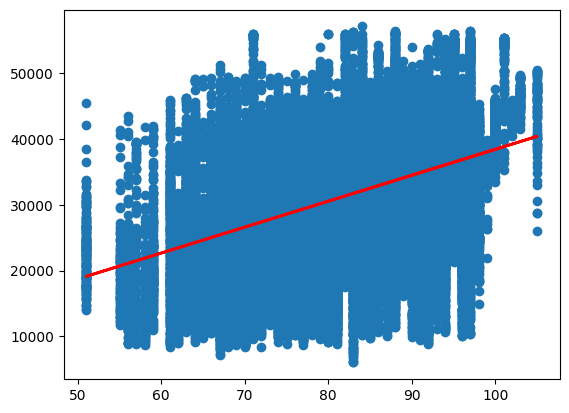

In [380]:
# EDA of variables in finalized glogs
plt.scatter(glogs_wcp['prev_year_wins'],glogs_wcp['attendance'])

slope, intercept = np.polyfit(glogs_wcp['prev_year_wins'], glogs_wcp['attendance'], 1)
plt.plot(glogs_wcp['prev_year_wins'], slope * glogs_wcp['prev_year_wins'] + intercept, color='red', linewidth=2)
slope

In [226]:
#########################################################################################################

In [33]:
glogs['month'] = glogs['date'].dt.to_period('M')
monthly_avg = glogs.groupby('month')['attendance'].mean().reset_index()

monthly_avg

,month,attendance
0,2005-04,29801.054441
1,2005-05,29350.427536
2,2005-06,31743.929471
3,2005-07,32877.165842
4,2005-08,32638.507246
...,...,...
79,2016-06,30563.133005
80,2016-07,33313.517150
81,2016-08,29774.219340
82,2016-09,28636.362745


In [34]:
elogs = pd.read_csv('https://raw.githubusercontent.com/tmarchok1/DS440_project/main/econdata.csv')


elogs = elogs.drop(columns=[
    "QUARTERLY GDP GROWTH RATE (%)", "MONTHLY HOME SUPPLY", "MORTGAGE INT. MONTHLY AVG(%)",
    "CORP. BOND YIELD(%)", "QUARTERLY REAL GDP", "PPI-CONST MAT.", "MED HOUSEHOLD INCOME", "% SHARE OF WORKING POPULATION"
])

elogs['DATE'] = pd.to_datetime(elogs['DATE'], format='%d-%m-%Y')

elogs['switched_date'] = elogs['DATE'].dt.strftime('%Y-%m-%d')


elogs

,DATE,UNRATE(%),CONSUMER CONF INDEX,CPIALLITEMS,INFLATION(%),GDP PER CAPITA,CSUSHPISA,switched_date
0,2022-05-01,3.6,106.4,123.322800,8.581511,74737,120.724,2022-05-01
1,2022-04-01,3.6,107.3,121.978170,8.258629,74737,121.813,2022-04-01
2,2022-03-01,3.6,107.2,121.301004,8.542456,73289,122.888,2022-03-01
3,2022-02-01,3.8,110.5,119.702806,7.871064,73289,123.831,2022-02-01
4,2022-01-01,4.0,113.8,118.619339,7.479872,73289,124.780,2022-01-01
...,...,...,...,...,...,...,...,...
236,2002-09-01,5.7,94.5,76.365830,1.514302,38099,284.767,2002-09-01
237,2002-08-01,5.7,97.4,76.239257,1.802817,38099,290.371,2002-08-01
238,2002-07-01,5.8,106.3,75.986111,1.464789,38099,296.496,2002-07-01
239,2002-06-01,5.8,110.3,75.901729,1.067416,37860,301.704,2002-06-01


In [35]:
elogs["DATE"].dtype

elogs['DATEE'] = pd.to_datetime(elogs['DATE'], format='%d-%Y')
elogs["DATE"] =  elogs['DATE'].dt.to_period('M') 
elogs_filtered = elogs[elogs['DATE'] <= '2016-11']      


elogs_filtered

,DATE,UNRATE(%),CONSUMER CONF INDEX,CPIALLITEMS,INFLATION(%),GDP PER CAPITA,CSUSHPISA,switched_date,DATEE
66,2016-11,4.7,107.1,101.829405,1.692537,58263,175.147,2016-11-01,2016-11-01
67,2016-10,4.9,98.6,101.988043,1.635988,58263,174.341,2016-10-01,2016-10-01
68,2016-09,5.0,104.1,101.861048,1.463784,57784,173.133,2016-09-01,2016-09-01
69,2016-08,4.9,101.1,101.616762,1.062874,57784,171.542,2016-08-01,2016-08-01
70,2016-07,4.8,97.3,101.523519,0.827139,57784,170.054,2016-07-01,2016-07-01
...,...,...,...,...,...,...,...,...,...
236,2002-09,5.7,94.5,76.365830,1.514302,38099,284.767,2002-09-01,2002-09-01
237,2002-08,5.7,97.4,76.239257,1.802817,38099,290.371,2002-08-01,2002-08-01
238,2002-07,5.8,106.3,75.986111,1.464789,38099,296.496,2002-07-01,2002-07-01
239,2002-06,5.8,110.3,75.901729,1.067416,37860,301.704,2002-06-01,2002-06-01


In [41]:
econmerge = pd.merge(elogs_filtered, monthly_avg, left_on='DATE', right_on='month', how='left') 
econmerge_clean = econmerge.dropna()


econmerge_clean
correlation_matrix = econmerge_clean[['UNRATE(%)', 'CONSUMER CONF INDEX', 'GDP PER CAPITA', 'INFLATION(%)', 'CPIALLITEMS', 'attendance']].corr()

correlation_matrix

,UNRATE(%),CONSUMER CONF INDEX,GDP PER CAPITA,INFLATION(%),CPIALLITEMS,attendance
UNRATE(%),1.000000,-0.849745,-0.117884,-0.343740,0.161572,-0.140374
CONSUMER CONF INDEX,-0.849745,1.000000,0.132433,0.122083,-0.144524,0.019900
GDP PER CAPITA,-0.117884,0.132433,1.000000,-0.370453,0.949881,-0.129365
INFLATION(%),-0.343740,0.122083,-0.370453,1.000000,-0.391868,0.198716
CPIALLITEMS,0.161572,-0.144524,0.949881,-0.391868,1.000000,-0.155665
attendance,-0.140374,0.019900,-0.129365,0.198716,-0.155665,1.000000


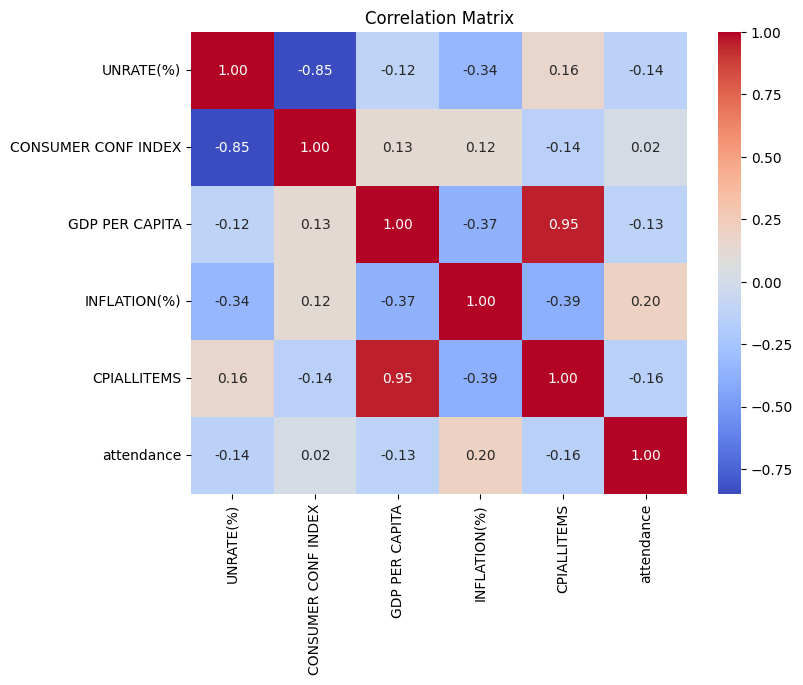

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix")
plt.show()